# Data analysis for CogSci 2024 paper figures
author: pam popp (pamop@nyu.edu)

In [1]:
# common stats analysis stack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import os
import pingouin as pg
import scipy

import warnings
warnings.filterwarnings('ignore')

# display all columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)

#color palette - purple and red
sns.set_palette(sns.color_palette("hls", 8))
mypalette = {"red":sns.color_palette("hls", 8)[0],"purple":sns.color_palette("hls", 8)[6]}
# muted tones
mypal = {"red":"#ED8F90","purple":"#B689B6"}
barcolor = sns.color_palette("ch:s=.25,rot=-.25")[1]

# seed RNG
np.random.seed(0)

# Plot for talk
sns.set_context("talk")

In [2]:
# Import data
# dir_path  = os.getcwd()
# change relative path depending on where you're running this script from
trialdf = pd.read_csv('data/trialdf.csv')

# these dataframes appropriately combined the data over different levels: e.g., game-level, subject-level, session (dyad) level
gamedf = pd.read_csv('data/gamedf.csv')
subjgamedf = pd.read_csv('data/subjgamedf.csv')
seshdf = pd.read_csv('data/sessiondf.csv')
subjseshdf = pd.read_csv('data/subjsessiondf.csv')

# trial level data. one row for each trial, plus an extra row at the end of each game that shares the end-game state (what reward is earned)
trialdf.head()

,subjid,session,trialNum,gameNum,costCond,resourceCond,visibilityCond,redFirst,counterbalance,objectLayer,eventName,turnCount,agent,target,turnStartTimestamp,responseTime,decisionMadeTimestamp,dataSavedTimestamp,redXloc,redYloc,purpleXloc,purpleYloc,farmItems,farmBox,purpleBackpack,redBackpack,gameover,legalMoves,purpleBackpackSize,purpleEnergy,purpleScore,purplePoints,purplePointsCumulative,redBackpackSize,redEnergy,redScore,redPoints,redPointsCumulative,lastTrial,energy_expense,targetColor,targetCat,actionCat,other_expense,ownBPsize,step_expense,step_other_expense,step_own_expense,step_box_expense,helping_event,helped,meFirst,steps,helpful_steps,player_helped_lasttrial,partner_helped_lasttrial,player_helpingevents_lasttrial,partner_helpingevents_lasttrial,player_helpfulsteps_lasttrial,partner_helpfulsteps_lasttrial,otherBPsize,ownScore,otherScore,ownEnergy,otherEnergy,ownPoints,otherPoints,ownPointsCumulative,otherPointsCumulative,ownBackpack,otherBackpack,nOwnVegFarm,nOtherVegFarm,nOwnVegBox,nOtherVegBox,nOwnVegInOwnBP,nOwnVegInOtherBP,nOtherVegInOwnBP,nOtherVegInOtherBP,nAnyVegInOwnBP,nAnyVegInOtherBP,ownHelpingEventsToDate,otherHelpingEventsToDate,ownHelpfulStepsToDate,otherHelpingStepsToDate,farmContents,ownDistanceToClosestOwnVeg,ownDistanceToClosestOtherVeg,otherDistanceToClosestOwnVeg,otherDistanceToClosestOtherVeg
0,4ISIiFA1J99JScred,4ISIiFA1J99JSc,1,0,high,even,full,True,12.0,Items04,targetPicked,0,red,Tomato04,1678818021993,3356.0,1678818025349,1678818025349,2,15,3,16,"Tomato04(9,13) Turnip02(14,15) Turnip00(11,7) ...",NaN,NaN,NaN,False,"red_none(2,15) Tomato04(9,13) Turnip02(14,15) ...",4,100,0,0,0,4,100,0,0,0,False,18.0,red,redVeg,ownVeg,0.0,4,9.0,0.0,9.0,0.0,0,False,True,9,0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,100,100,0,0,0,0,NaN,NaN,7,7,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,"Tomato04(9,13) Turnip02(14,15) Turnip00(11,7) ...",8.0,8.0,8.0,8.0
1,4ISIiFA1J99JScpurple,4ISIiFA1J99JSc,3,0,high,even,full,True,12.0,Items04,targetPicked,1,purple,Eggplant01,1678818026786,3786.0,1678818030572,1678818030573,9,14,3,16,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,NaN,"Tomato04(22,2)",False,"purple_none(3,16) Turnip02(14,15) Turnip00(11,...",4,100,0,0,0,4,82,0,0,0,False,16.0,purple,purpleVeg,ownVeg,0.0,4,8.0,0.0,8.0,0.0,0,False,False,8,0,NaN,False,NaN,0.0,NaN,0.0,4,0,0,100,82,0,0,0,0,NaN,"Tomato04(22,2)",7,6,0,0,0,0,0,1,0,1,NaN,0.0,NaN,0.0,"Turnip02(14,15) Turnip00(11,7) Strawberry01(13...",8.0,8.0,5.0,0.0
2,4ISIiFA1J99JScred,4ISIiFA1J99JSc,5,0,high,even,full,True,12.0,Items04,targetPicked,2,red,Strawberry02,1678818033697,1826.0,1678818035523,1678818035523,9,13,5,11,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,"Eggplant01(22,5)","Tomato04(22,2)",False,"red_none(9,13) box(16,5) Turnip02(14,15) Turni...",4,84,0,0,0,4,82,0,0,0,False,2.0,red,redVeg,ownVeg,0.0,4,1.0,0.0,1.0,0.0,0,False,True,1,0,False,False,0.0,0.0,0.0,0.0,4,0,0,82,84,0,0,0,0,"Tomato04(22,2)","Eggplant01(22,5)",6,6,0,0,1,0,0,1,1,1,0.0,0.0,0.0,0.0,"Turnip02(14,15) Turnip00(11,7) Strawberry01(13...",1.0,6.0,6.0,2.0
3,4ISIiFA1J99JScpurple,4ISIiFA1J99JSc,7,0,high,even,full,True,12.0,Items04,targetPicked,3,purple,Turnip01,1678818034933,1768.0,1678818036701,1678818036701,9,13,5,10,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,"Eggplant01(22,5)","Tomato04(22,2) Strawberry02(23,2)",False,"purple_none(5,10) box(16,5) Turnip02(14,15) Tu...",4,84,0,0,0,4,80,0,0,0,False,2.0,purple,purpleVeg,ownVeg,0.0,4,1.0,0.0,1.0,0.0,0,False,False,1,0,False,False,0.0,0.0,0.0,0.0,4,0,0,84,80,0,0,0,0,"Eggplant01(22,5)","Tomato04(22,2) Strawberry02(23,2)",6,5,0,0,1,0,0,2,1,2,0.0,0.0,0.0,0.0,"Turnip02(14,15) Turnip00(11,7) Strawberry01(13...",1.0,5.0,6.0,6.0
4,4ISIiFA1J99JScred,4ISIiFA1J99JSc,9,0,high,even,full,True,12.0,Items04,targetPicked,4,red,Strawberry01,1678818038081,1127.0,1678818039208,1678818039209,9,14,5,10,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,"Eggplant01(22,5) Turnip01(23,5)","Tomato04(22,2) Strawberry02(23,2)",False,"red_none(9,14) box(16,5) Tur

In [3]:
# Counts per condition
print("Number of participants: N = "+str(trialdf["subjid"].nunique()))

print(str(trialdf["session"].nunique()) + " total dyads (aka 'sessions')")

# display(df.groupby(['costCond'])["session"].nunique())
# display(df.groupby(['resourceCond'])["session"].nunique())
# display(df.groupby(['visibilityCond'])["session"].nunique())
print("Number of dyads per condition:")
display(trialdf.groupby(['costCond','resourceCond','visibilityCond'])["session"].nunique())


Number of participants: N = 628
314 total dyads (aka 'sessions')
Number of dyads per condition:


costCond  resourceCond  visibilityCond
high      even          full              39
                        self              40
          uneven        full              39
                        self              35
low       even          full              45
                        self              45
          uneven        full              32
                        self              39
Name: session, dtype: int64

In [4]:
# Utils for calculating p-values from t-tests and then showing them on figures using asterisks
def get_pvals(df,dependentvar):
    perf_ttests={}
    for col in ['costCond','visibilityCond','resourceCond']:
        print(col)
        x_values = df[col].unique()
        stat, pvalue = scipy.stats.ttest_ind(
            df.loc[(df[col]==x_values[0]),dependentvar], 
            df.loc[(df[col]==x_values[1]),dependentvar])
        print(stat)
        print(pvalue)
        perf_ttests[col] = {'stat':stat,'pval':pvalue}
    return perf_ttests

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

# Figure 2B

Performance by condition; average points earned in a game by a single sub- ject. Error bars are 95% confidence intervals. Cost, visibility, and resource condition were constant within dyads across all twelve games in a session. (**: p < 0.01, ***: p < 0.001 from independent two-sample t-tests between conditions.)

costCond
-96.86774433181259
0.0
visibilityCond
-2.862373624571804
0.004216402627671393
resourceCond
7.888304817127255
3.4949551321361694e-15


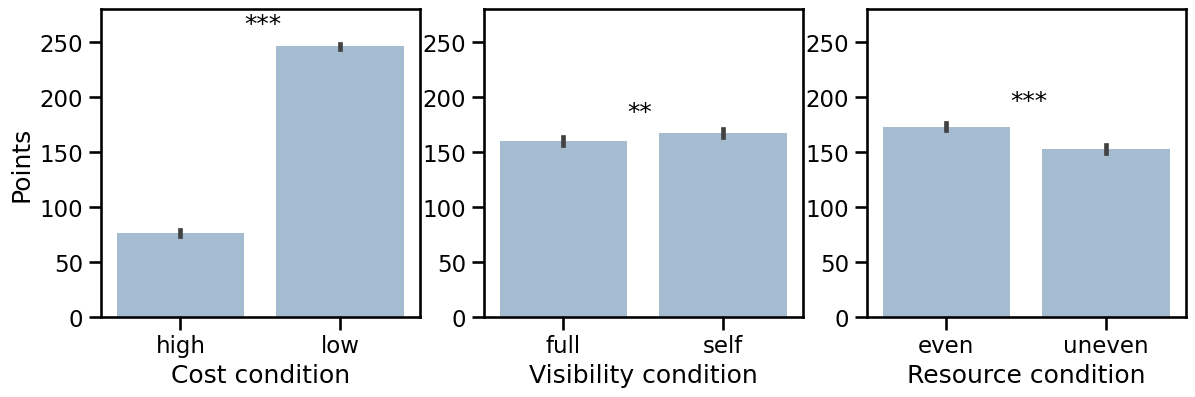

In [24]:
# points
df=subjgamedf

perf_ttests=get_pvals(df,"points")
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(14,4))
# ax0, ax1, ax2 = axes[0], axes[1], axes[2]
conditions = ["costCond","visibilityCond","resourceCond","redFirst"]
for i in range(3):
    sns.barplot(data=df, x=conditions[i], y="points", estimator="mean", ax=axes[i],color=barcolor)
    axes[i].set_ylim([0,280])
    if i==0:
        axes[i].set_xlabel("Cost condition") #,fontsize="12")
        axes[i].text(x=0.4,y=260,s=convert_pvalue_to_asterisks(perf_ttests[conditions[i]]['pval']))
    elif i==1:
        axes[i].set_xlabel("Visibility condition") #,fontsize="12")
        axes[i].text(x=0.4,y=180,s=convert_pvalue_to_asterisks(perf_ttests[conditions[i]]['pval']))
    elif i==2:
        axes[i].set_xlabel("Resource condition") #,fontsize="12")
        axes[i].text(x=0.4,y=190,s=convert_pvalue_to_asterisks(perf_ttests[conditions[i]]['pval']))
    # elif i==3:
    #     axes[i].set_xlabel("Red went first",fontsize="12")
    if i>0:
        axes[i].set_ylabel("")
    #     axes[i].legend().remove()
    else:
        axes[i].set_ylabel("Points") #,fontsize="12")

plt.show()

# Figure 3

Helpfulness, or average number of helping actions in a game by a player, by experimental condition (as in Fig. 2B).


costCond
1.6727782067818793
0.09441248562705386
visibilityCond
-1.2111490758202097
0.2258762644368125
resourceCond
-4.954965149283062
7.391995679393371e-07


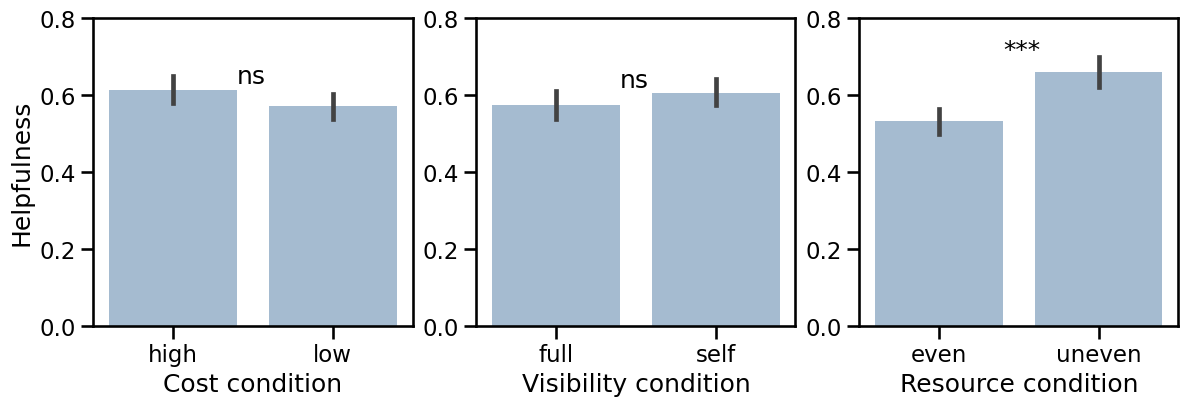

In [21]:
# subject game level
df=subjgamedf

perf_ttests=get_pvals(df,"helping_event")
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(14,4))
# ax0, ax1, ax2 = axes[0], axes[1], axes[2]
conditions = ["costCond","visibilityCond","resourceCond","redFirst"]
for i in range(3):
    sns.barplot(data=df, x=conditions[i], y="helping_event", estimator="mean", ax=axes[i],color=barcolor)
    axes[i].set_ylim([0,0.8])
    if i==0:
        axes[i].set_xlabel("Cost condition") #,fontsize="12")
        axes[i].text(x=0.4,y=0.63,s=convert_pvalue_to_asterisks(perf_ttests[conditions[i]]['pval']))
    elif i==1:
        axes[i].set_xlabel("Visibility condition") #,fontsize="12")
        axes[i].text(x=0.4,y=0.62,s=convert_pvalue_to_asterisks(perf_ttests[conditions[i]]['pval']))
    elif i==2:
        axes[i].set_xlabel("Resource condition") #,fontsize="12")
        axes[i].text(x=0.4,y=0.7,s=convert_pvalue_to_asterisks(perf_ttests[conditions[i]]['pval']))
    # elif i==3:
    #     axes[i].set_xlabel("Red went first",fontsize="12")
    if i>0:
        axes[i].set_ylabel("")
    #     axes[i].legend().remove()
    else:
        axes[i].set_ylabel("Helpfulness") #,fontsize="12")

# Figure 4A

A and B show how “helpfulness” (average number of helping actions in a game by a player) varies with player backpack size and the color uniformity of clusters (patches) of vegetables, respectively.

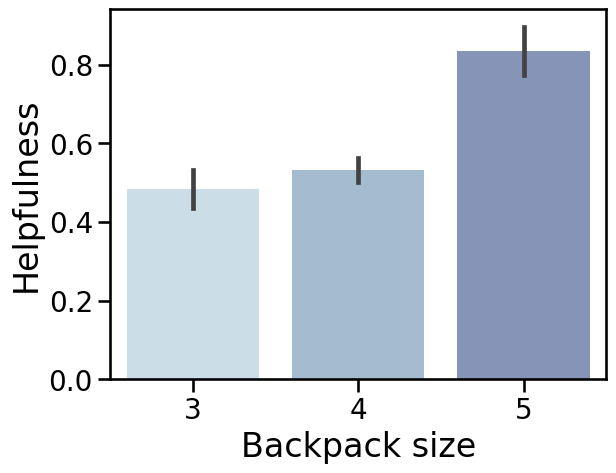

In [7]:
h = sns.barplot(data=subjgamedf, x="ownBPsize", y="helping_event", estimator="mean",palette=sns.color_palette("ch:s=.25,rot=-.25"))
# h.set_title("Human",fontsize=20)
h.set_xlabel("Backpack size",fontsize=24)
h.set_ylabel("Helpfulness",fontsize=24) #
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(title="Backpack Size") #,bbox_to_anchor=(1.03, 1.0))
plt.show()


# Figure 4B

A and B show how “helpfulness” (average number of helping actions in a game by a player) varies with player backpack size and the color uniformity of clusters (patches) of vegetables, respectively.

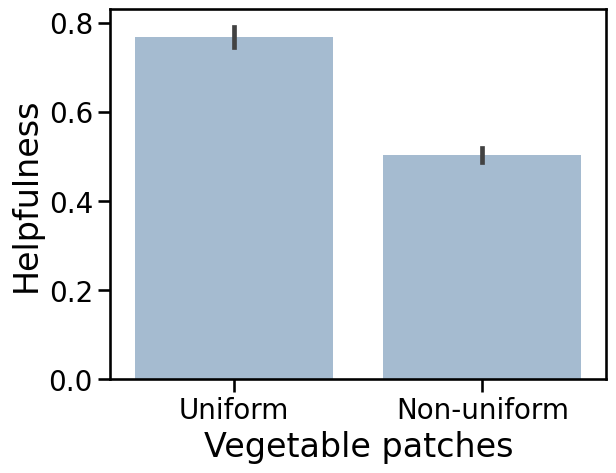

In [8]:
h = sns.barplot(data=subjgamedf, x="patchUniformity", y="helping_event", estimator="mean",errorbar='se',color=barcolor)
# h.set_title("Helping events by Patch uniformity")
h.set_xlabel("Vegetable patches",fontsize=24)
h.set_ylabel("Helpfulness",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
h.set_xticklabels(['Uniform','Non-uniform'])
# h.legend().remove()#(title="Patch Uniformity")
# fig.autofmt_xdate(rotation=45)
plt.show()

# Figure 4C

C and D present the proportion of trials in which a player chose to help given local contextual features; In C, the costliness of the least costly helpful action measured as distance (number of steps) to the closest partner’s vegetable.

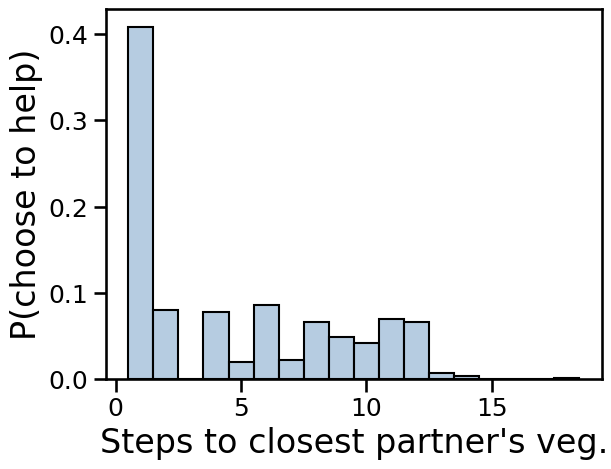

In [9]:
h = sns.histplot(data=trialdf.loc[trialdf['helped']==True], x="ownDistanceToClosestOtherVeg", stat='proportion',color=barcolor, discrete=True) #, estimator="mean") #,palette=sns.color_palette("ch:s=.25,rot=-.25"))
# h.set_title("",fontsize=20) 
h.set_xlabel("Steps to closest partner's veg.",fontsize=24)
h.set_ylabel("P(choose to help)",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.legend(title="Backpack Size") #,bbox_to_anchor=(1.03, 1.0))
plt.show()

# Figure 4D

C and D present the proportion of trials in which a player chose to help given local contextual features; In D, the player’s number of remaining energy units which contributed to bonus calculation.

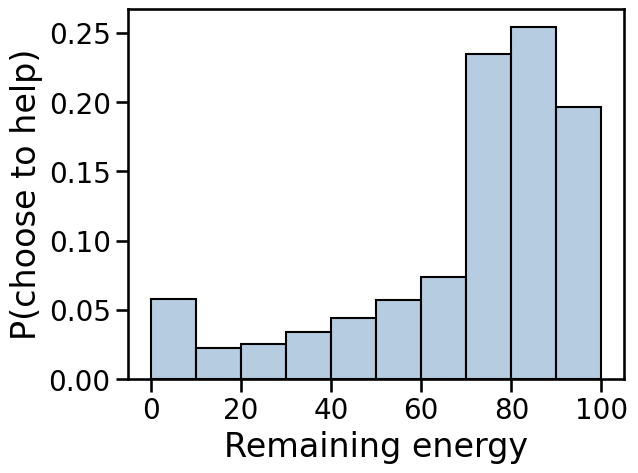

In [10]:
h = sns.histplot(data=trialdf.loc[trialdf['helped']==True], x="ownEnergy", stat='probability',color=barcolor,binwidth=10) #, estimator="mean") #,palette=sns.color_palette("ch:s=.25,rot=-.25"))
# h.set_title("",fontsize=20)
h.set_xlabel("Remaining energy",fontsize=24)
h.set_ylabel("P(choose to help)",fontsize=24) #Proportion of helping events
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim([0,1])
# plt.legend(title="Backpack Size") #,bbox_to_anchor=(1.03, 1.0))
plt.show()

# Figure 5

Proportion of helping events on each trial (turn) averaged across subjects. The orange curve reflects the pro- portion of helping actions selected on trials where the player’s partner had helped on the previous trial, while the teal curve reflects helping when the partner did not help on the previous trial. The proportion is normalized by the number of helpful actions available on each turn. Plots reflect data from the first ten turns of games beginning with eight vegetables.


In [11]:
# NORMALIZE BY NUMBER OF AVAILABLE HELPING EVENTS
# parse legal moves to count number of helpful actions available
# trialdf['legalMoves']

# n legal helpful actions (actions with color color)
def nHelpfulActions(row,color):
    if isinstance(row["legalMoves"],float):
        return 0
    try:
        allItems = row["legalMoves"].split(" ") # list of strings like "Tomato04(9,13)" of all veg on whole display
    except:
        print(type(row["legalMoves"])) # what went wrong
    colorCode = {'red':['Tomato','Strawberry'],'purple':['Turnip','Eggplant']}
    moves = []
    # for each veg, get the xy loc from the string. if x>20, veg not on farm
    for s in allItems:
        try:
            loc = s.split("(")[1].split(",") # get part after ( and then split by comma
        except:
            print(s)
        moves.append(s)
    
    # only count the items of the desired color
    helpfulMoves = [i for i in moves if any([veg in i for veg in colorCode[color]])] 
    return len(helpfulMoves)

def nLegalActions(row):
    if isinstance(row["legalMoves"],float):
        return 0
    try:
        allItems = row["legalMoves"].split(" ") # list of strings like "Tomato04(9,13)" of all veg on whole display
    except:
        print(type(row["legalMoves"])) # what went wrong

    moves = []
    # for each veg, get the xy loc from the string. if x>20, veg not on farm
    for s in allItems:
        try:
            loc = s.split("(")[1].split(",") # get part after ( and then split by comma
        except:
            print(s)
        moves.append(s)
    
    return len(moves)

trialdf['nHelpfulActions'] = trialdf.apply(lambda row: nHelpfulActions(row,'purple') if row['agent']=="red" else nHelpfulActions(row,'red'),axis=1)
trialdf['nLegalActions'] = trialdf.apply(lambda row: nLegalActions(row),axis=1)
trialdf['normedHelped'] = trialdf.apply(lambda row: 0 if row['nHelpfulActions']==0 else row["helping_event"]/row['nHelpfulActions'],axis=1)
trialdf['normedHelpedLegal'] = trialdf.apply(lambda row: 0 if row['nHelpfulActions']==0 else row["helping_event"]/(row['nHelpfulActions']/row['nLegalActions']),axis=1)

trialdf

,subjid,session,trialNum,gameNum,costCond,resourceCond,visibilityCond,redFirst,counterbalance,objectLayer,eventName,turnCount,agent,target,turnStartTimestamp,responseTime,decisionMadeTimestamp,dataSavedTimestamp,redXloc,redYloc,purpleXloc,purpleYloc,farmItems,farmBox,purpleBackpack,redBackpack,gameover,legalMoves,purpleBackpackSize,purpleEnergy,purpleScore,purplePoints,purplePointsCumulative,redBackpackSize,redEnergy,redScore,redPoints,redPointsCumulative,lastTrial,energy_expense,targetColor,targetCat,actionCat,other_expense,ownBPsize,step_expense,step_other_expense,step_own_expense,step_box_expense,helping_event,helped,meFirst,steps,helpful_steps,player_helped_lasttrial,partner_helped_lasttrial,player_helpingevents_lasttrial,partner_helpingevents_lasttrial,player_helpfulsteps_lasttrial,partner_helpfulsteps_lasttrial,otherBPsize,ownScore,otherScore,ownEnergy,otherEnergy,ownPoints,otherPoints,ownPointsCumulative,otherPointsCumulative,ownBackpack,otherBackpack,nOwnVegFarm,nOtherVegFarm,nOwnVegBox,nOtherVegBox,nOwnVegInOwnBP,nOwnVegInOtherBP,nOtherVegInOwnBP,nOtherVegInOtherBP,nAnyVegInOwnBP,nAnyVegInOtherBP,ownHelpingEventsToDate,otherHelpingEventsToDate,ownHelpfulStepsToDate,otherHelpingStepsToDate,farmContents,ownDistanceToClosestOwnVeg,ownDistanceToClosestOtherVeg,otherDistanceToClosestOwnVeg,otherDistanceToClosestOtherVeg,nHelpfulActions,nLegalActions,normedHelped,normedHelpedLegal
0,4ISIiFA1J99JScred,4ISIiFA1J99JSc,1,0,high,even,full,True,12.0,Items04,targetPicked,0,red,Tomato04,1678818021993,3356.0,1678818025349,1678818025349,2,15,3,16,"Tomato04(9,13) Turnip02(14,15) Turnip00(11,7) ...",NaN,NaN,NaN,False,"red_none(2,15) Tomato04(9,13) Turnip02(14,15) ...",4,100,0,0,0,4,100,0,0,0,False,18.0,red,redVeg,ownVeg,0.0,4,9.0,0.0,9.0,0.0,0,False,True,9,0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,100,100,0,0,0,0,NaN,NaN,7,7,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,"Tomato04(9,13) Turnip02(14,15) Turnip00(11,7) ...",8.0,8.0,8.0,8.0,7,15,0.0,0.0
1,4ISIiFA1J99JScpurple,4ISIiFA1J99JSc,3,0,high,even,full,True,12.0,Items04,targetPicked,1,purple,Eggplant01,1678818026786,3786.0,1678818030572,1678818030573,9,14,3,16,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,NaN,"Tomato04(22,2)",False,"purple_none(3,16) Turnip02(14,15) Turnip00(11,...",4,100,0,0,0,4,82,0,0,0,False,16.0,purple,purpleVeg,ownVeg,0.0,4,8.0,0.0,8.0,0.0,0,False,False,8,0,NaN,False,NaN,0.0,NaN,0.0,4,0,0,100,82,0,0,0,0,NaN,"Tomato04(22,2)",7,6,0,0,0,0,0,1,0,1,NaN,0.0,NaN,0.0,"Turnip02(14,15) Turnip00(11,7) Strawberry01(13...",8.0,8.0,5.0,0.0,6,14,0.0,0.0
2,4ISIiFA1J99JScred,4ISIiFA1J99JSc,5,0,high,even,full,True,12.0,Items04,targetPicked,2,red,Strawberry02,1678818033697,1826.0,1678818035523,1678818035523,9,13,5,11,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,"Eggplant01(22,5)","Tomato04(22,2)",False,"red_none(9,13) box(16,5) Turnip02(14,15) Turni...",4,84,0,0,0,4,82,0,0,0,False,2.0,red,redVeg,ownVeg,0.0,4,1.0,0.0,1.0,0.0,0,False,True,1,0,False,False,0.0,0.0,0.0,0.0,4,0,0,82,84,0,0,0,0,"Tomato04(22,2)","Eggplant01(22,5)",6,6,0,0,1,0,0,1,1,1,0.0,0.0,0.0,0.0,"Turnip02(14,15) Turnip00(11,7) Strawberry01(13...",1.0,6.0,6.0,2.0,6,14,0.0,0.0
3,4ISIiFA1J99JScpurple,4ISIiFA1J99JSc,7,0,high,even,full,True,12.0,Items04,targetPicked,3,purple,Turnip01,1678818034933,1768.0,1678818036701,1678818036701,9,13,5,10,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) ...",NaN,"Eggplant01(22,5)","Tomato04(22,2) Strawberry02(23,2)",False,"purple_none(5,10) box(16,5) Turnip02(14,15) Tu...",4,84,0,0,0,4,80,0,0,0,False,2.0,purple,purpleVeg,ownVeg,0.0,4,1.0,0.0,1.0,0.0,0,False,False,1,0,False,False,0.0,0.0,0.0,0.0,4,0,0,84,80,0,0,0,0,"Eggplant01(22,5)","Tomato04(22,2) Strawberry02(23,2)",6,5,0,0,1,0,0,2,1,2,0.0,0.0,0.0,0.0,"Turnip02(14,15) Turnip00(11,7) Strawberry01(13...",1.0,5.0,6.0,6.0,5,13,0.0,0.0
4,4ISIiFA1J99JScred,4ISIiFA1J99JSc,9,0,high,even,full,True,12.0,Items04,targetPicked,4,red,Strawberry01,1678818038081,1127.0,1678818039208,1678818039209,9,14,5,10,"Tomato04(22,2) Turnip02(14,15) Turnip00(11,7) .

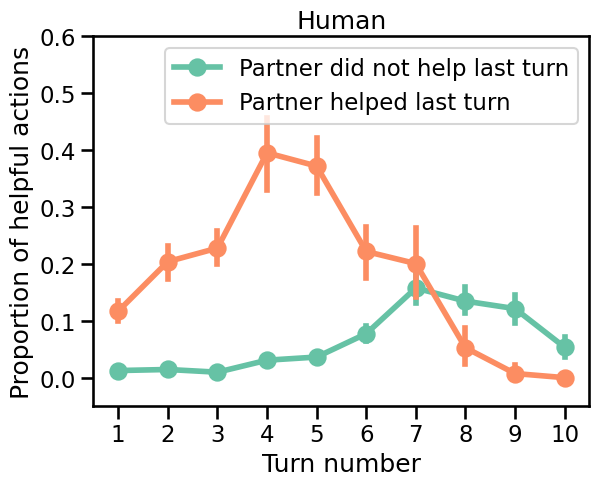

In [16]:
# Human only
# Environments with eight versus fourteen vegetables
eightveg = ["Items00","Items01","Items02","Items03","Items06","Items07","Items08","Items09"]
fourteenveg = ["Items04","Items05","Items10","Items11"]

temp = trialdf.loc[(trialdf["objectLayer"].isin(eightveg)) & (trialdf['turnCount']<11)]
human_washelped = temp.loc[(temp["partner_helped_lasttrial"]==True)].groupby(['subjid','turnCount']).agg({'helping_event':'mean','nHelpfulActions':'mean'}).reset_index() 
human_washelped['normed'] = human_washelped.apply(lambda row: row['helping_event']/row['nHelpfulActions'] if row['nHelpfulActions']>0 else 0,axis=1)
human_washelped
human_wasnothelped = temp.loc[(temp["partner_helped_lasttrial"]==False)].groupby(['subjid','turnCount']).agg({'helping_event':'mean','nHelpfulActions':'mean'}).reset_index() 
# # normalize by dividing by number
human_wasnothelped['normed'] = human_wasnothelped.apply(lambda row: row['helping_event']/row['nHelpfulActions'] if row['nHelpfulActions']>0 else 0,axis=1)

h = sns.pointplot(data=human_wasnothelped,color=sns.color_palette("Set2")[0], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner did not help last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)
# h = sns.barplot(data=gamedf, x="gameNum", y="purplePoints", estimator="mean",label="Purple player",color=mypalette["purple"],alpha=0.5)
h = sns.pointplot(data=human_washelped,color=sns.color_palette("Set2")[1], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner helped last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)
# h = sns.pointplot(data=human_washelped,color=sns.color_palette("Set2")[1],ax=axes[0], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner helped last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)

# "partner_helped_lasttrial"
h.set_title("Human")
h.set_xlabel("Turn number")
h.set_ylabel("Proportion of helpful actions")
h.set_ylim([-.05,0.6])
# h.legend()
plt.legend()
plt.show()

In [15]:
# Comparing human with nearest neighbor agent

# HUMAN

# Environments with eight versus fourteen vegetables
eightveg = ["Items00","Items01","Items02","Items03","Items06","Items07","Items08","Items09"]
fourteenveg = ["Items04","Items05","Items10","Items11"]

temp = trialdf.loc[(trialdf["objectLayer"].isin(eightveg)) & (trialdf['turnCount']<11)]
human_washelped = temp.loc[(temp["partner_helped_lasttrial"]==True)].groupby(['subjid','turnCount']).agg({'helping_event':'mean','nHelpfulActions':'mean'}).reset_index() 
human_washelped['normed'] = human_washelped.apply(lambda row: row['helping_event']/row['nHelpfulActions'] if row['nHelpfulActions']>0 else 0,axis=1)
human_washelped
human_wasnothelped = temp.loc[(temp["partner_helped_lasttrial"]==False)].groupby(['subjid','turnCount']).agg({'helping_event':'mean','nHelpfulActions':'mean'}).reset_index() 
# # normalize by dividing by number
human_wasnothelped['normed'] = human_wasnothelped.apply(lambda row: row['helping_event']/row['nHelpfulActions'] if row['nHelpfulActions']>0 else 0,axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))


h = sns.pointplot(data=human_wasnothelped,color=sns.color_palette("Set2")[0],ax=axes[0], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner did not help last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)
# h = sns.barplot(data=gamedf, x="gameNum", y="purplePoints", estimator="mean",label="Purple player",color=mypalette["purple"],alpha=0.5)
h = sns.pointplot(data=human_washelped,color=sns.color_palette("Set2")[1],ax=axes[0], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner helped last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)
# h = sns.pointplot(data=human_washelped,color=sns.color_palette("Set2")[1],ax=axes[0], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner helped last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)

# "partner_helped_lasttrial"
h.set_title("Human")
h.set_xlabel("Turn number")
h.set_ylabel("Proportion of helpful actions")
h.set_ylim([-.05,0.6])
# h.legend()
# plt.legend()
# plt.show()

# # NN DEFAULT
# agent='nn-true'
# temp = nn_trialdf.loc[(nn_trialdf["agentPolicy"]==agent) & (nn_trialdf["objectLayer"].isin(eightveg)) & (nn_trialdf['turnCount']<11)]
# nn_washelped = temp.loc[(temp["partner_helped_lasttrial"]==True)].groupby(['agentid','turnCount']).agg({'helping_event':'mean','nHelpfulActions':'mean'}).reset_index() 
# nn_wasnothelped = temp.loc[(temp["partner_helped_lasttrial"]==False)].groupby(['agentid','turnCount']).agg({'helping_event':'mean','nHelpfulActions':'mean'}).reset_index() 
# nn_washelped['normed'] = nn_washelped.apply(lambda row: row['helping_event']/row['nHelpfulActions'] if row['nHelpfulActions']>0 else 0,axis=1)
# nn_wasnothelped['normed'] = nn_wasnothelped.apply(lambda row: row['helping_event']/row['nHelpfulActions'] if row['nHelpfulActions']>0 else 0,axis=1)

# h = sns.pointplot(data=nn_wasnothelped,color=sns.color_palette("Set2")[0], ax=axes[1],x="turnCount", y="normed", estimator="mean",ci=95,label="Partner did not help last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)
# # h = sns.pointplot(data=trialdf.loc[(trialdf["agentPolicy"]==agent) & (trialdf["objectLayer"].isin(eightveg))& (trialdf['turnCount']<16)],color=sns.color_palette("Set2")[0], x="turnCount", y="helped", estimator="mean",ci=95,label="Proportion helpful action selected") #,label="Red player",color=mypalette["red"],alpha=0.5)
# # h = sns.barplot(data=gamedf, x="gameNum", y="purplePoints", estimator="mean",label="Purple player",color=mypalette["purple"],alpha=0.5)
# h = sns.pointplot(data=nn_washelped,color=sns.color_palette("Set2")[1],ax=axes[1], x="turnCount", y="normed", estimator="mean",ci=95,label="Partner helped last turn") #,label="Red player",color=mypalette["red"],alpha=0.5)
# # h.set_xlim([0,15])
# h.set_title("Nearest Neighbor (default)")
# h.set_xlabel("Turn number")
# h.set_ylim([-.05,0.6])
# h.set_ylabel("")
# plt.legend(bbox_to_anchor=(1.0, 1.0))#(title="Patch Uniformity")

# plt.legend()
plt.show()